# Mat->Py->Mat Lone PSD Example

This notebook is an example, with a single power spectrum, of integrating Python FOOOF into a Matlab workflow. 

It is part of a trio of files that must be run in order:
- `LonePSD_A_*
- `LonePSD_B_*
- `LonePSD_C_*

This code must be run after `LonePSD_A_matlab_preprocessing.m` has been run. 

In [1]:
%matplotlib inline

import numpy as np
from scipy.io import loadmat, savemat

from fooof import FOOOF

In [2]:
# Load the mat file 
dat = loadmat('power_spectrum.mat')

# Unpack data from dictioanry, and squeeze into numpy arrays
freqs = np.squeeze(dat['freqs'])
psd = np.squeeze(dat['psd'])

In [3]:
# Initialize FOOOF object
fm = FOOOF()


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.98 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is freq-res)
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 1 - 50 Hz                        
                                 Frequency Resolution is 0.98 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):   

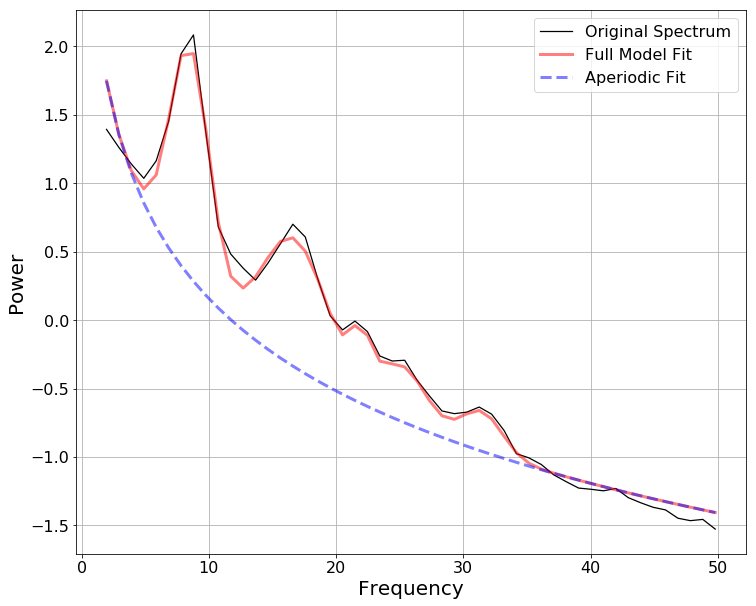

In [4]:
# Fit the FOOOF model, and report
fm.report(freqs, psd, [1, 50])

In [5]:
# Extract FOOOF results from object
fooof_results = fm.get_results()

# Convert FOOOF results to a dictionary
#  This is useful for saving out as a mat file
fooof_results_dict = fooof_results._asdict()

In [6]:
# Save FOOOF results out to a mat file
savemat('fooof_results', fooof_results_dict)